In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
cd drive/My\ Drive/game

/content/drive/My Drive/game


In [0]:
import numpy as np  
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img  
from keras.models import Sequential  
from keras.layers import Dropout, Flatten, Dense,Conv2D ,MaxPooling2D
from keras import applications  
from keras.utils.np_utils import to_categorical  
import matplotlib.pyplot as plt  
import math  
import cv2 
import keras
import os
import tensorflow as tf

Using TensorFlow backend.


In [0]:
img_width, img_height = 128, 128
train_data_dir = 'train'

In [0]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (img_width, img_height, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.2))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.2))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.2))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 3672, activation = 'relu'))
classifier.add(Dense(units = 2, activation = 'softmax'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [0]:
batch_size = 64
train_datagen = ImageDataGenerator(rescale=1./255,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    train_data_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation') # set as validation data

Found 1464 images belonging to 2 classes.
Found 365 images belonging to 2 classes.


In [0]:
ACCURACY_THRESHOLD = 0.99
class MyCustomCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    if(logs.get('acc') > ACCURACY_THRESHOLD):   
        print("\nReached %2.2f%% accuracy, so stopping training!!" %(ACCURACY_THRESHOLD*100))   
        self.model.stop_training = True

callback = MyCustomCallback()

In [0]:
train_lenght = 1464  
test_lenght = 365  
with tf.device('/device:GPU:0'):
  history=classifier.fit_generator(
    train_generator,
    steps_per_epoch=train_lenght // batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=test_lenght // batch_size,
    callbacks=[callback])

Epoch 1/50





22/22 [==============================] - 492s 22s/step - loss: 1.0490 - acc: 0.5032 - val_loss: 0.6924 - val_acc: 0.5188
Epoch 2/50
22/22 [==============================] - 22s 1s/step - loss: 0.6826 - acc: 0.5511 - val_loss: 0.6791 - val_acc: 0.5050
Epoch 3/50
22/22 [==============================] - 5s 227ms/step - loss: 0.5955 - acc: 0.7108 - val_loss: 0.5310 - val_acc: 0.6711
Epoch 4/50
22/22 [==============================] - 5s 216ms/step - loss: 0.4360 - acc: 0.8145 - val_loss: 0.4260 - val_acc: 0.9070
Epoch 5/50
22/22 [==============================] - 5s 206ms/step - loss: 0.2718 - acc: 0.8991 - val_loss: 0.3707 - val_acc: 0.8870
Epoch 6/50
22/22 [==============================] - 5s 209ms/step - loss: 0.1826 - acc: 0.9225 - val_loss: 0.2610 - val_acc: 0.9136
Epoch 7/50
22/22 [==============================] - 5s 220ms/step - loss: 0.1014 - acc: 0.9650 - val_loss: 0.1663 - val_acc: 0.9531
Epoch 8/50
22/22 [==============================] - 5s 242ms/step - loss:

n9ez


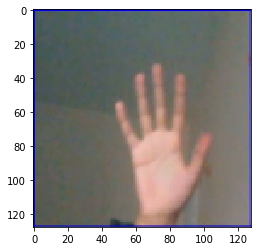

n9ez


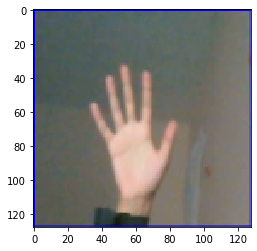

n9ez


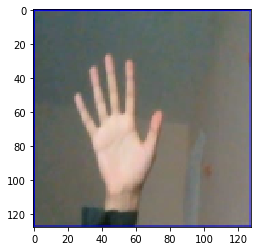

n9ez


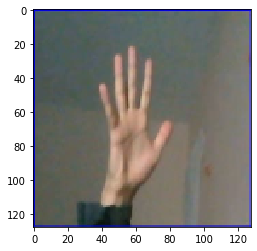

n9ez


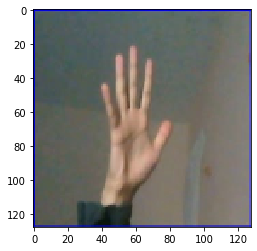

kml


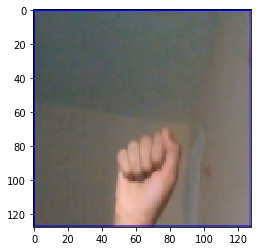

kml


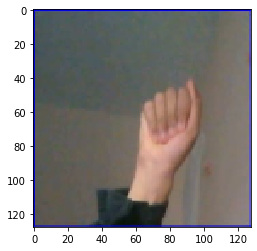

kml


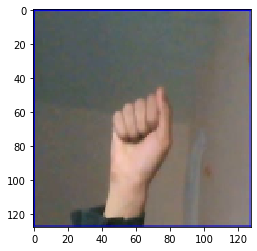

kml


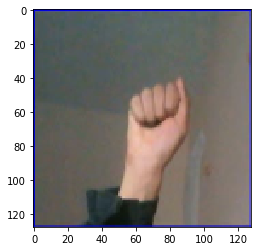

In [0]:
import os
test_names = os.listdir('test/')
x_test = []
classes = ['n9ez','kml']
for name in test_names:
  img = cv2.imread('test/'+name)
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  img = cv2.resize(img,(128,128))
  x_test.append(img)
x_test = np.array(x_test)
x_test = x_test/255.
answers = classifier.predict(x_test)
answers = np.argmax(answers,axis=1)
for i in range(len(answers)):
  print(classes[answers[i]])
  plt.imshow(x_test[i])
  plt.show()

In [0]:
 # serialize classifier to JSON
classifier_json = classifier.to_json()
with open("game.json", "w") as json_file:
    json_file.write(classifier_json)
# serialize weights to HDF5
classifier.save_weights("game.h5")
print("Saved classifier to disk")

Saved classifier to disk
